In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_1.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_1.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,7.822495e-12,7.134652e-10,2.324559e-11,0.977902,1.301303e-11,1.127733e-13,7.960927e-07,5.200864e-10,...,1.292838e-09,2.800413e-28,5.079084e-17,4.961960e-18,1.721663e-08,6.022003e-06,-4.748012e-04,2.443565e-27,1.667862e-27,9.890312e-29
1,0.000017,0.405009,3.050828e-11,1.372937e-09,8.948202e-11,0.977902,5.067645e-11,8.310460e-13,1.592392e-06,2.078772e-09,...,2.798802e-09,1.478328e-27,1.145534e-16,1.455148e-17,2.592810e-08,6.074067e-06,-4.748797e-04,1.732800e-26,1.134001e-26,7.184540e-28
2,0.000025,0.405009,6.696854e-11,1.982633e-09,1.938576e-10,0.977902,1.110424e-10,2.698281e-12,2.388910e-06,4.675698e-09,...,4.788706e-09,4.669653e-27,2.041889e-16,3.111857e-17,3.471755e-08,6.130308e-06,-4.749605e-04,6.895671e-26,4.491129e-26,2.935790e-27
3,0.000033,0.405009,1.161572e-10,2.546603e-09,3.318036e-10,0.977902,1.922016e-10,6.233027e-12,3.185655e-06,8.310141e-09,...,7.205151e-09,1.137567e-26,3.199411e-16,5.584766e-17,4.359047e-08,6.189976e-06,-4.750434e-04,1.996584e-25,1.308652e-25,8.721924e-27
4,0.000042,0.405009,1.771166e-10,3.068551e-09,4.992189e-10,0.977902,2.923731e-10,1.190801e-11,3.982635e-06,1.298139e-08,...,9.997410e-09,2.355109e-26,4.620664e-16,8.968819e-17,5.255141e-08,6.252395e-06,-4.751280e-04,4.725393e-25,3.129258e-25,2.115530e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119995,0.999967,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119996,0.999975,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119997,0.999983,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

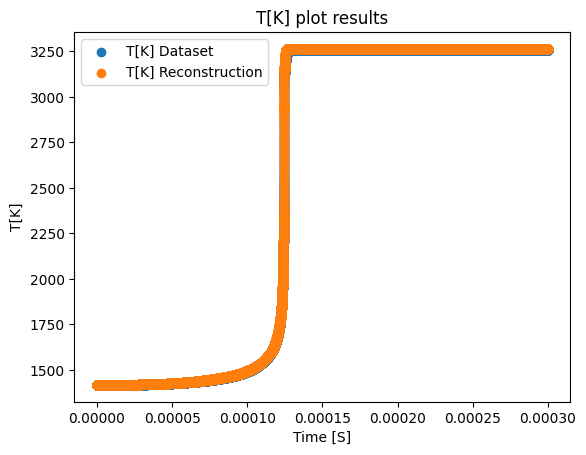

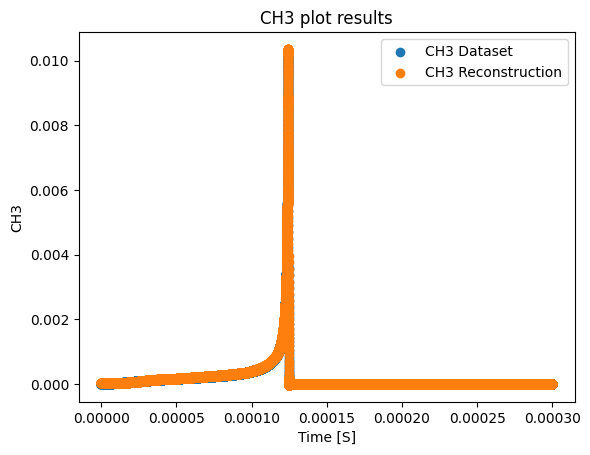

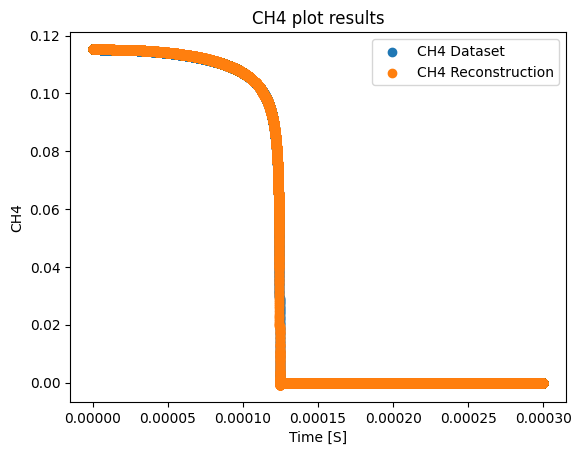

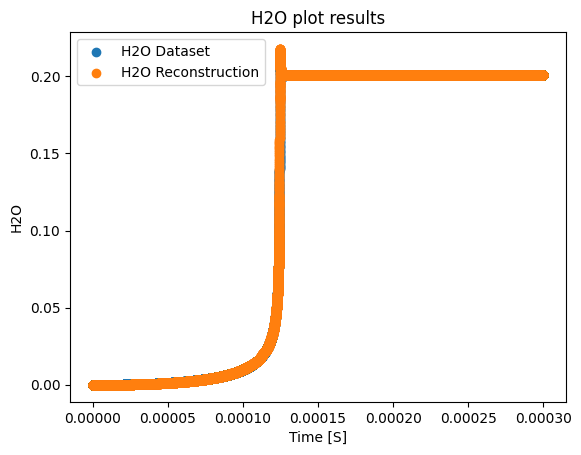

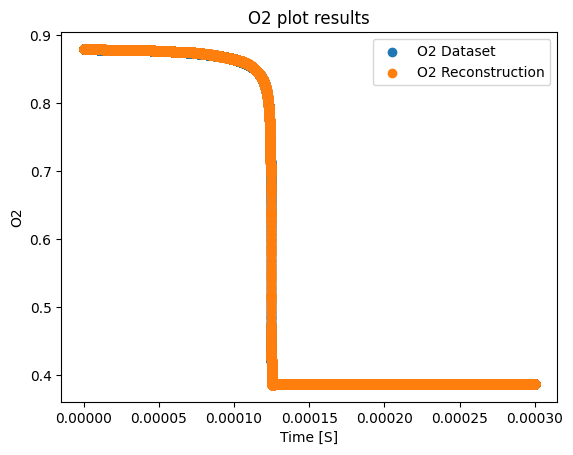

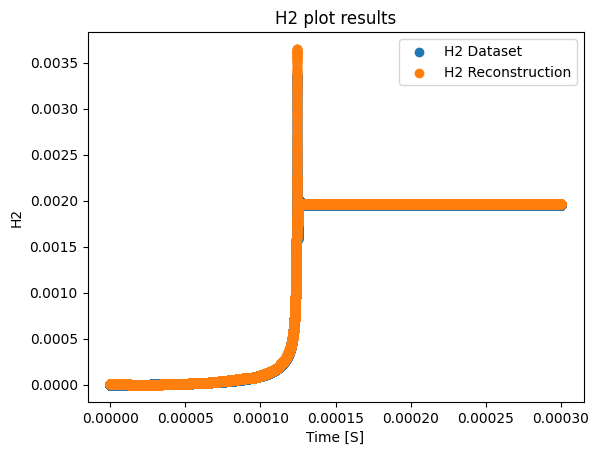

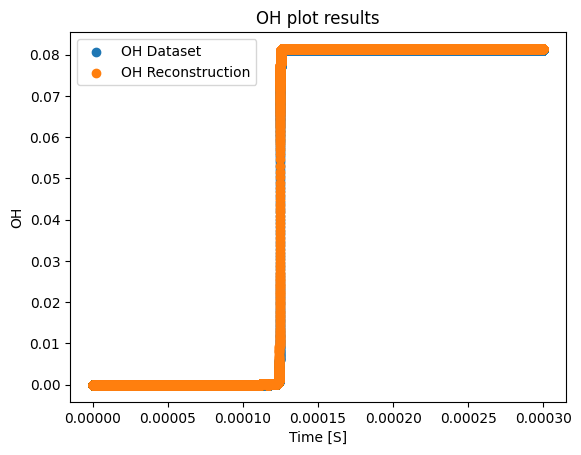

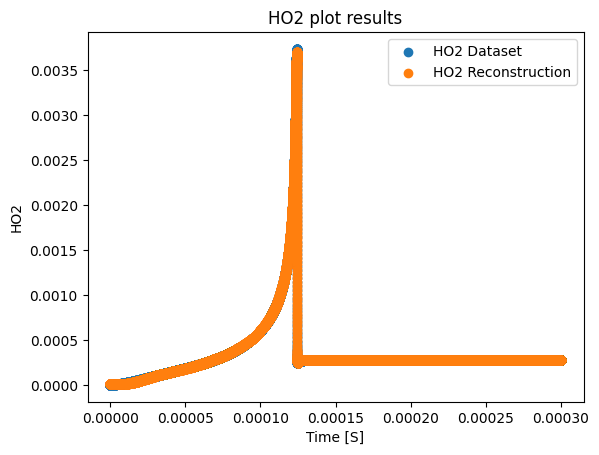

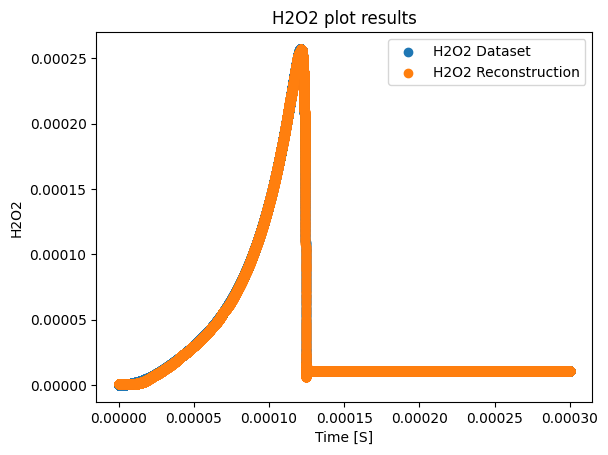

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

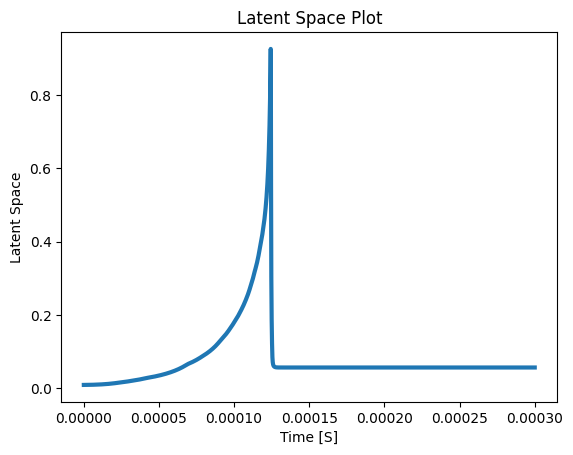

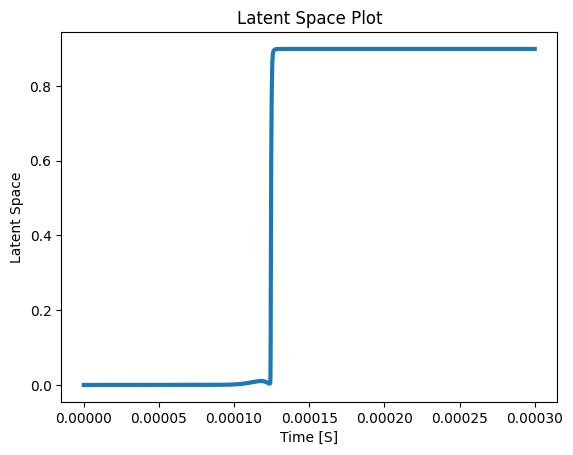

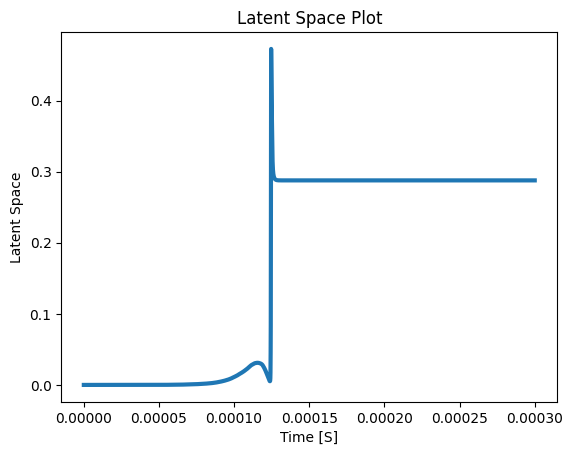

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,7.822495e-12,7.134652e-10,2.324559e-11,0.977902,1.301303e-11,1.127733e-13,7.960927e-07,5.200864e-10,3.201940e-36,...,3.362150e-10,1.701829e-29,1.267476e-17,8.126962e-19,8.576469e-09,5.974948e-06,-4.747254e-04,8.549307e-29,6.698691e-29,3.375792e-30
1,0.405009,3.050828e-11,1.372937e-09,8.948202e-11,0.977902,5.067645e-11,8.310460e-13,1.592392e-06,2.078772e-09,-6.987793e-33,...,1.292838e-09,2.800413e-28,5.079084e-17,4.961960e-18,1.721663e-08,6.022003e-06,-4.748012e-04,2.443565e-27,1.667862e-27,9.890312e-29
2,0.405009,6.696854e-11,1.982633e-09,1.938576e-10,0.977902,1.110424e-10,2.698281e-12,2.388910e-06,4.675698e-09,-7.387401e-32,...,2.798802e-09,1.478328e-27,1.145534e-16,1.455148e-17,2.592810e-08,6.074067e-06,-4.748797e-04,1.732800e-26,1.134001e-26,7.184540e-28
3,0.405009,1.161572e-10,2.546603e-09,3.318036e-10,0.977902,1.922016e-10,6.233027e-12,3.185655e-06,8.310141e-09,1.159261e-32,...,4.788706e-09,4.669653e-27,2.041889e-16,3.111857e-17,3.471755e-08,6.130308e-06,-4.749605e-04,6.895671e-26,4.491129e-26,2.935790e-27
4,0.405009,1.771166e-10,3.068551e-09,4.992189e-10,0.977902,2.923731e-10,1.190801e-11,3.982635e-06,1.298139e-08,1.304590e-31,...,7.205151e-09,1.137567e-26,3.199411e-16,5.584766e-17,4.359047e-08,6.189976e-06,-4.750434e-04,1.996584e-25,1.308652e-25,8.721924e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,6.422606e-08,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119995,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,6.422606e-08,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119996,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,6.422606e-08,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26
119997,0.930056,1.300208e-01,2.353296e-01,9.209993e-01,0.430408,8.096931e-01,5.797419e-01,7.205703e-02,4.143973e-02,6.422606e-08,...,-3.249037e-24,1.156826e-25,-2.647611e-27,2.275193e-30,4.479816e-33,2.929987e-34,5.498643e-37,9.180975e-25,-2.565956e-25,2.995108e-26


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.179750,0.289845,0.286437,0.283732,-0.184937,0.274891,0.192706,0.726580,0.486919,0.195240,...,0.205238,0.223997,0.217876,0.218983,0.208255,0.213875,0.120192,0.221951,0.217951,0.220326
1,0.832343,0.742650,0.746149,0.742172,-0.841988,0.757422,0.836732,0.314421,-0.164902,0.824019,...,-0.418335,-0.417586,-0.421113,-0.421891,-0.419315,-0.419903,-0.052321,-0.416790,-0.418272,-0.420366
2,0.724647,0.837499,0.839925,0.833639,-0.733551,0.828239,0.742658,0.206061,-0.066947,0.723413,...,-0.332491,-0.331888,-0.336705,-0.336065,-0.333446,-0.336827,0.036390,-0.333933,-0.337934,-0.335385


HO2     0.726580
Cw      0.546333
HCO     0.496894
H2O2    0.486919
HCCO    0.390717
Name: 0, dtype: float64
CO2     0.838140
H2O     0.836732
T[K]    0.832343
C       0.824019
OH      0.757422
Name: 1, dtype: float64
H     0.839925
H2    0.837499
O     0.833639
CO    0.833514
OH    0.828239
Name: 2, dtype: float64


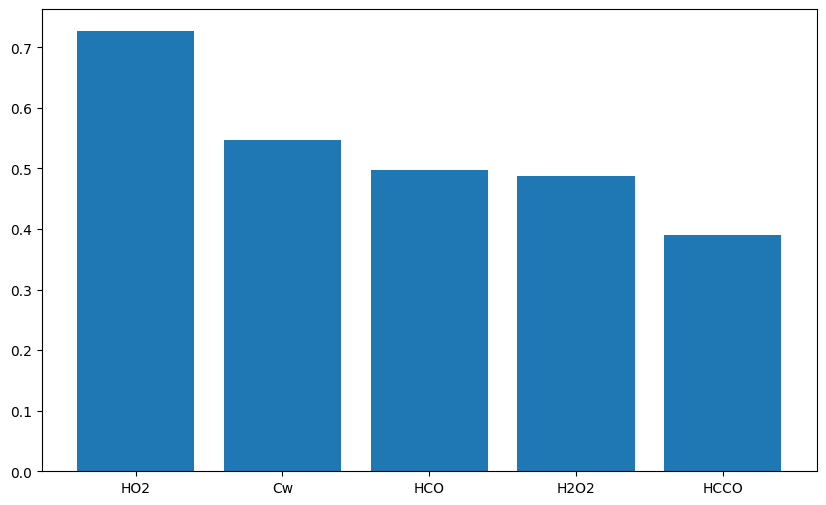

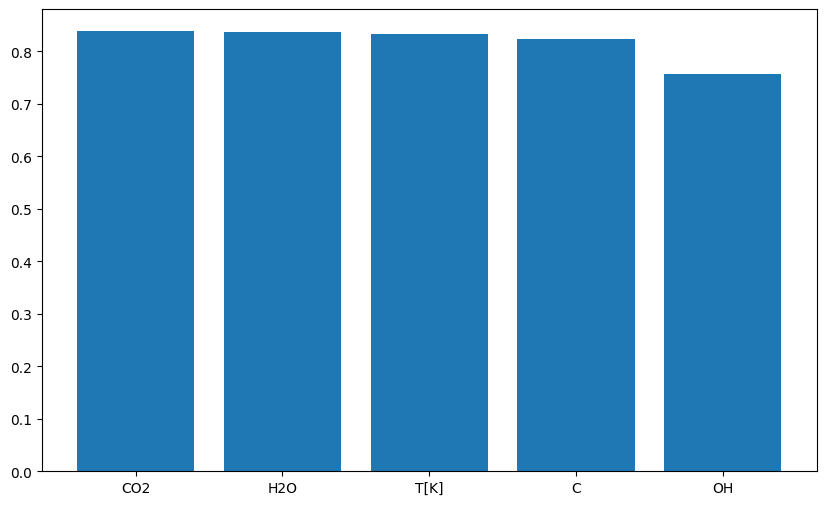

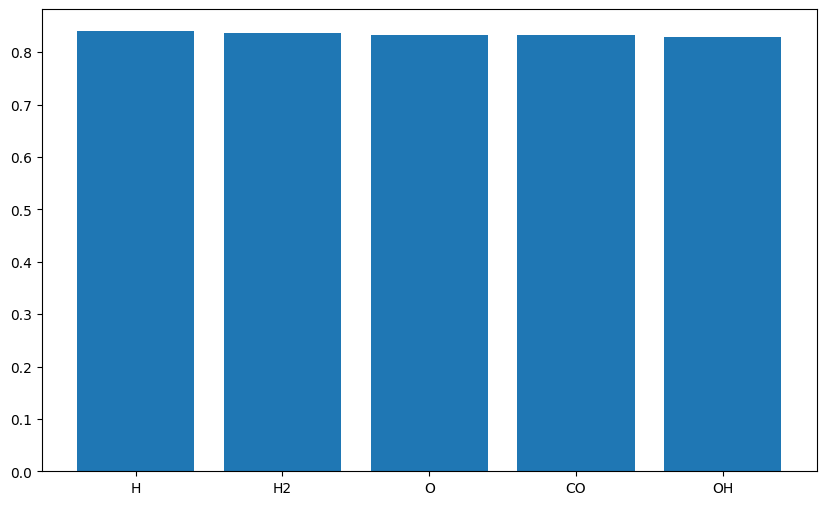

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.241199,0.324273,0.319619,0.318262,-0.241541,0.309540,0.250068,0.816365,0.575612,0.256768,...,0.215154,0.243543,0.232332,0.233511,0.219117,0.227215,0.120346,0.240926,0.234101,0.236347
1,0.915069,0.835845,0.838614,0.838058,-0.915843,0.847578,0.910683,0.355046,-0.280404,0.905268,...,-0.748280,-0.747773,-0.752077,-0.752739,-0.749498,-0.750765,-0.051004,-0.747407,-0.749539,-0.750977
2,0.833412,0.910309,0.912260,0.910245,-0.834128,0.903166,0.840510,0.274495,-0.202614,0.828409,...,-0.679595,-0.673537,-0.685115,-0.684641,-0.680946,-0.684863,0.015963,-0.676200,-0.684397,-0.682007


HO2     0.816365
Cw      0.650268
HCO     0.614088
H2O2    0.575612
HCCO    0.499164
Name: 0, dtype: float64
CO2     0.915353
T[K]    0.915069
H2O     0.910683
C       0.905268
OH      0.847578
Name: 1, dtype: float64
CO    0.912627
H     0.912260
H2    0.910309
O     0.910245
OH    0.903166
Name: 2, dtype: float64


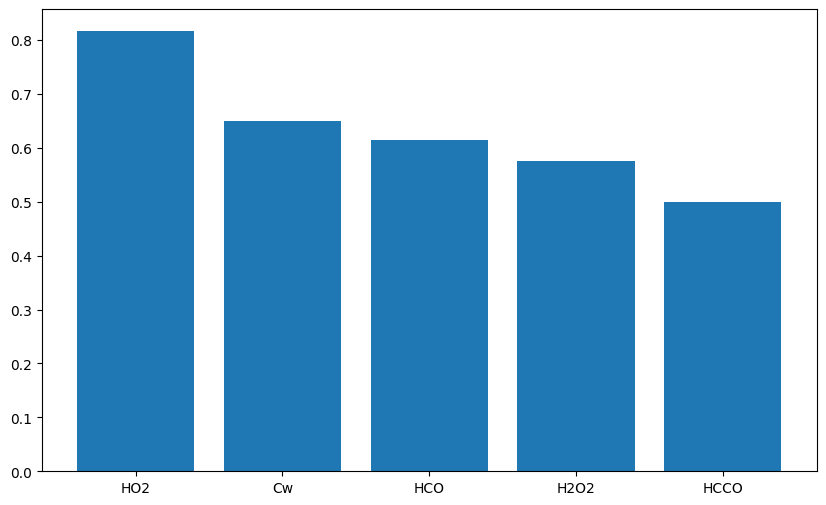

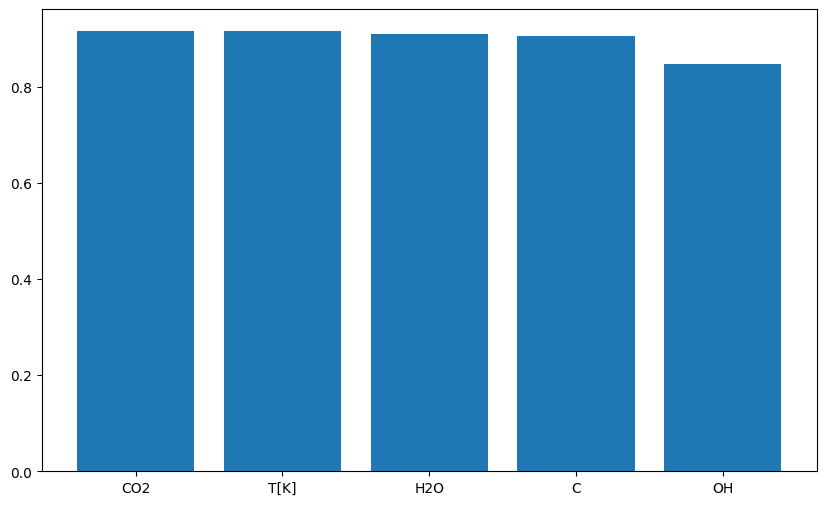

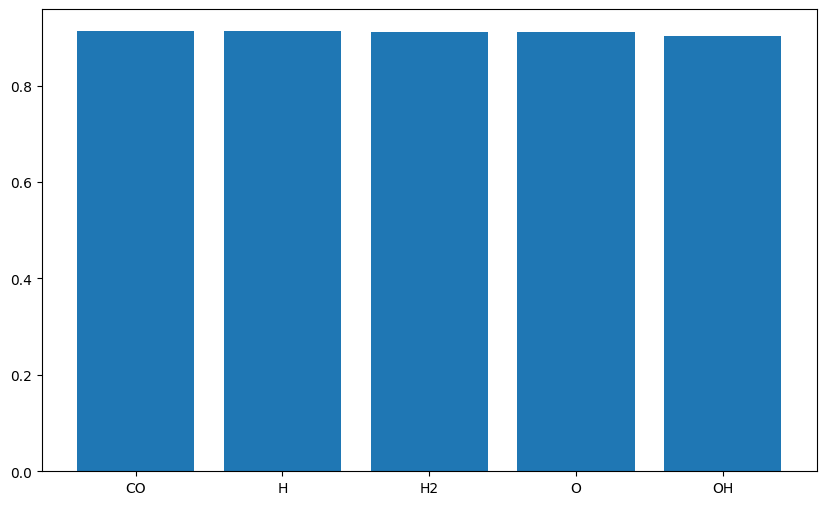

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.179753,0.289872,0.286465,0.283762,-0.184940,0.274919,0.192707,0.726580,0.486891,0.195242,...,0.205230,0.223966,0.217868,0.218969,0.208244,0.213869,0.120173,0.221925,0.217934,0.220298
1,0.832356,0.742635,0.746134,0.742154,-0.841997,0.757406,0.836742,0.314417,-0.164934,0.824029,...,-0.418351,-0.417620,-0.421134,-0.421905,-0.419329,-0.419925,-0.052352,-0.416814,-0.418293,-0.420403
2,0.724653,0.837483,0.839957,0.833673,-0.733557,0.828271,0.742663,0.206011,-0.066971,0.723371,...,-0.332447,-0.331922,-0.336669,-0.336036,-0.333405,-0.336787,0.036417,-0.333962,-0.337954,-0.335370


HO2     0.726580
Cw      0.546334
HCO     0.496895
H2O2    0.486891
HCCO    0.390665
Name: 0, dtype: float64
CO2     0.838150
H2O     0.836742
T[K]    0.832356
C       0.824029
OH      0.757406
Name: 1, dtype: float64
H     0.839957
H2    0.837483
O     0.833673
CO    0.833500
OH    0.828271
Name: 2, dtype: float64


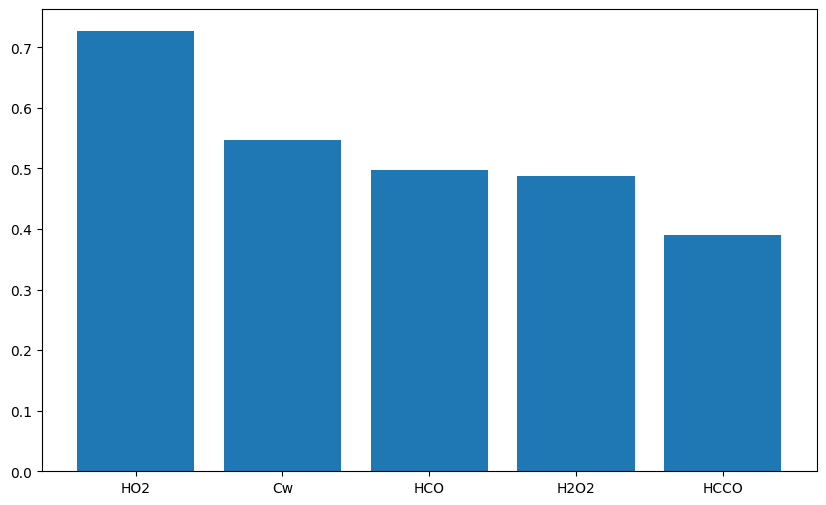

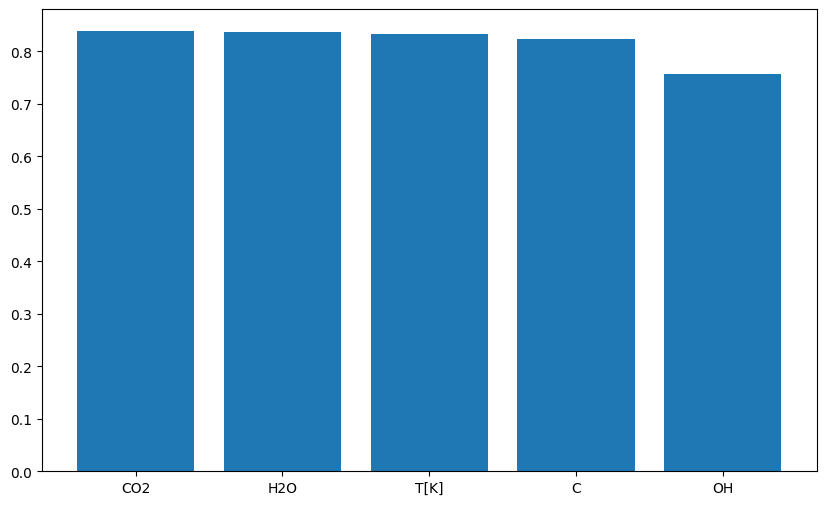

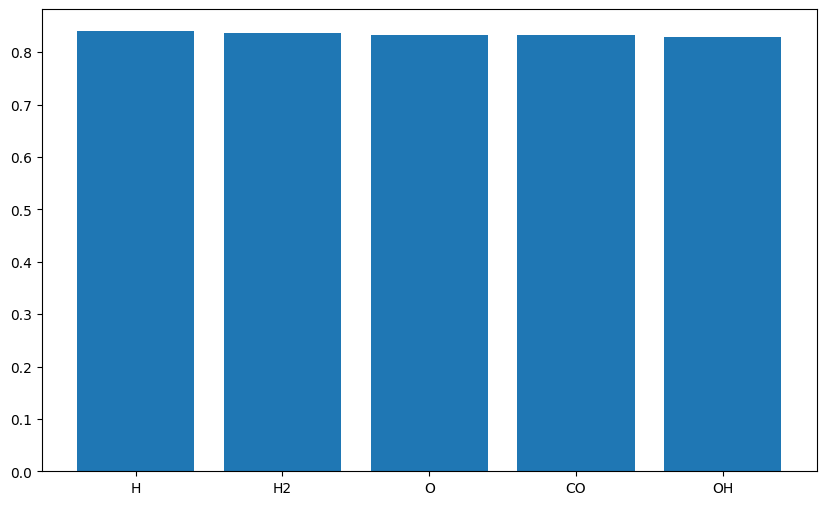

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)